In [611]:
import pandas as pd
import seaborn as sns 
import scipy as sp 
from  matplotlib import pyplot as plt
sns.set(font_scale=1.1, style="white",  #palette="viridis", 
        rc={'font.size': 16, 'figure.figsize': (7,4), 'axes.grid': True, 'lines.linewidth':2.0, 
            'grid.color': '.8', 'grid.linewidth': 0.5,})

In [164]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [467]:
import sys
sys.path.append("/Users/ipaulo/yandexDisk/DIPLOMA/CODE/py-src/")
from itr import * 
import rpy2.robjects as ro
import rpy2
# ro.r.source("/Users/ipaulo/yandexDisk/DIPLOMA/CODE/src/clean_sources.R");

itr.py is imported!


In [6]:
chen_1 = ro.globalenv['Scenario1Enriched']
chen_2 = ro.globalenv['Scenario2Enriched']
chen_4 = ro.globalenv['Scenario4Enriched']
pred_value_general = ro.globalenv['PredValueGeneral']
get_ko_learning_value_and_predicted_dose = ro.globalenv['GetKOLearningValueAndPredictedDose']

In [28]:
get_data = ro.globalenv['GetDataForShvechikov.1'] 
n_train_samples = 100
n_test_samples = 100
noise_sd = 0.05
train = get_data(n_train_samples, noise_sd)
test = get_data(n_test_samples, noise_sd)

In [137]:
get_data = ro.globalenv['Scenario1Enriched']   # Chen
n_train_samples = 800
n_test_samples = 1000
n_cov = 30
ko_train = get_data(n_train_samples, n_cov, 0)
ko_test = get_data(n_test_samples, n_cov, 0)

In [244]:
get_data = ro.globalenv['Scenario1Enriched']   # Chen
n_train_samples = 50
n_test_samples = 100
n_cov = 10
ko_train = get_data(n_train_samples, n_cov, 0)
ko_test = get_data(n_test_samples, n_cov, 0)

itr.py is imported!


In [23]:
get_ko_learning_value_and_predicted_dose(ko_train, ko_test);

.
.
.
.
*
.
.
.
*

optimization finished, #iter = 7244

obj = -356.842184, rho = -1.014858

nSV = 539, nBSV = 178



In [29]:
C, A, R, A_opt = unpack_data_from_rpyobj(ko_train)
C_test, A_test, R_test, A_opt_test = unpack_data_from_rpyobj(ko_test)

In [152]:
C, A, R, A_opt = unpack_data_from_rpyobj(train)
C_test, A_test, R_test, A_opt_test = unpack_data_from_rpyobj(test)
X, X_test = [np.hstack([a,b]) for a, b in zip([C, C_test], [A, A_test])]
(means_test, vars_test), m = predict_with_GP(X, R, X_test)

Optimization restart 1/10, f = -125.02657036417719
Optimization restart 2/10, f = -125.02657036632166
Optimization restart 3/10, f = -125.02657036251017
Optimization restart 4/10, f = -125.02657035977467
Optimization restart 5/10, f = -125.02657034384625
Optimization restart 6/10, f = -125.02657036344701
Optimization restart 7/10, f = -125.02657034419144
Optimization restart 8/10, f = -125.0265703195654
Optimization restart 9/10, f = -125.02657035042378
Optimization restart 10/10, f = -125.02657035430646


In [472]:
n_cov, n_train, n_test = 30, 50, 1000  # data gen
s_factors_percs = np.arange(.5,1, .01)
s_factors = sp.stats.norm.ppf(s_factors_percs) # 50 factors evenly splitted
n_repeats = 50
granularity = 50

In [ ]:
gpy.models.GPRegression()

In [573]:
a = np.arange(10)

itr.py is imported!


In [585]:
b = np.zeros_like(a)

In [586]:
b[:] = a 

In [587]:
a[4] = 100

In [588]:
b

array([0, 1, 2, 3, 0, 5, 6, 7, 8, 9])

In [589]:
a

array([  0,   1,   2,   3, 100,   5,   6,   7,   8,   9])

In [571]:
gpy.normalizer.Standardize()

In [569]:
m.normalizer

In [568]:
np.percentile(ko_train.rx2("R"), [0,100])

array([-59.91412281,  12.96716396])

In [603]:
fit_params = {"mean_fn": False, "n_restarts": 1, "verbose":False, "robust":True,
              "initialize": True}
v, m = fit_and_predict(ko_train, ko_test, granularity, 
                       s_factors,  pred_value_general, fit_params) [1:]

In [601]:
o = m.param_array.copy()

itr.py is imported!


In [600]:
m.param_array

array([ 100000.        ,       4.43553779,       5.20726139,
          8581.44442458,    7148.8238735 ,    9935.16759788,
          6041.86154611,    7043.56013263,    7682.7996767 ,
          7915.88762837,    6935.18561703,    7197.28998601,
          8461.41471391,    7176.61643582,    6852.54431338,
          7389.67320431,    6344.62485257,    8044.22048377,
          6829.44948172,    7726.90917568,    6875.91488485,
          8805.50707248,    6557.14134953,    6412.54149819,
          6946.52187318,    9223.45428368,    6893.9130405 ,
          7379.32125211,    5515.46804386,    7111.05576344,
          7728.02339271,       3.12137424,       2.31189006])

In [599]:
o[0] = 0

itr.py is imported!


array([ 100000.        ,       4.43553779,       5.20726139,
          8581.44442458,    7148.8238735 ,    9935.16759788,
          6041.86154611,    7043.56013263,    7682.7996767 ,
          7915.88762837,    6935.18561703,    7197.28998601,
          8461.41471391,    7176.61643582,    6852.54431338,
          7389.67320431,    6344.62485257,    8044.22048377,
          6829.44948172,    7726.90917568,    6875.91488485,
          8805.50707248,    6557.14134953,    6412.54149819,
          6946.52187318,    9223.45428368,    6893.9130405 ,
          7379.32125211,    5515.46804386,    7111.05576344,
          7728.02339271,       3.12137424,       2.31189006])

In [595]:
m.param_array

array([ 100000.        ,       4.43553779,       5.20726139,
          8581.44442458,    7148.8238735 ,    9935.16759788,
          6041.86154611,    7043.56013263,    7682.7996767 ,
          7915.88762837,    6935.18561703,    7197.28998601,
          8461.41471391,    7176.61643582,    6852.54431338,
          7389.67320431,    6344.62485257,    8044.22048377,
          6829.44948172,    7726.90917568,    6875.91488485,
          8805.50707248,    6557.14134953,    6412.54149819,
          6946.52187318,    9223.45428368,    6893.9130405 ,
          7379.32125211,    5515.46804386,    7111.05576344,
          7728.02339271,       3.12137424,       2.31189006])

In [488]:
m.objective_function()

134.61824117340996

In [630]:
get_data = ro.globalenv['Scenario1Enriched'] 
n_cov, n_train_samples, n_test = 30, [50], 1000  # data gen
s_factors_percs = np.arange(.5,1, .01)
s_factors = sp.stats.norm.ppf(s_factors_percs) # 50 factors evenly splitted
n_repeats = 5000
# granularity = 50 
# fit_params = { "mean_fn": False, "n_restarts": 500, "verbose":False, "robust":True}
# fit_params = {"mean_fn": False, "n_restarts": 1, "verbose":False, "robust":True,
#               "initialize": True}
# data = np.zeros((len(n_train_samples), s_factors.size, n_repeats))
ideal_vals = []
for i, n_train in enumerate(n_train_samples):
    print(n_train, end=" ")
    start = timer()
    for k in range(n_repeats):
#         ko_train = get_data(n_train, n_cov, 777+k)
        ko_test = get_data(n_test, n_cov, 777+k)
        ideal_vals.append(pred_value_general(ko_test.rx2("D_opt"), ko_test))
    print("elapsed {:.2f} min".format((timer() - start) / 60))

50 elapsed 0.23 min


In [634]:
np.array(ideal_vals).mean()

7.9977302480443759

In [635]:
get_data = ro.globalenv['Scenario1Enriched'] 
n_cov, n_train_samples, n_test = 30, [50], 1000  # data gen
s_factors_percs = np.arange(.5,1, .01)
s_factors = sp.stats.norm.ppf(s_factors_percs) # 50 factors evenly splitted
n_repeats = 50
granularity = 50 
fit_params = { "mean_fn": True, "n_restarts": 100, "verbose":False, "robust":True}
# fit_params = {"mean_fn": False, "n_restarts": 1, "verbose":False, "robust":True,
#               "initialize": True}
data = np.zeros((len(n_train_samples), s_factors.size, n_repeats))
for i, n_train in enumerate(n_train_samples):
    print(n_train, end=" ")
    start = timer()
    for k in range(n_repeats):
        ko_train = get_data(n_train, n_cov, 777+k)
        ko_test = get_data(n_test, n_cov, 777+k)
        data[i,:,k] = fit_and_predict(ko_train, ko_test, granularity, s_factors,  
                                      pred_value_general, fit_params)[1] 
    print("elapsed {:.2f} min".format((timer() - start) / 60))

50 

 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:229: RuntimeWarning:invalid value encountered in true_divide
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:129: RuntimeWarning:overflow encountered in square
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:130: RuntimeWarning:invalid value encountered in add


elapsed 22.72 min


In [636]:
df_data = pd.DataFrame.from_records(generate_tuples(data, n_train_samples, s_factors_percs, "chen1"))
df_data.columns = ["sc", "n", "fac", "sam"]
df_data_restarts_100_with_mean =  df_data

itr.py is imported!


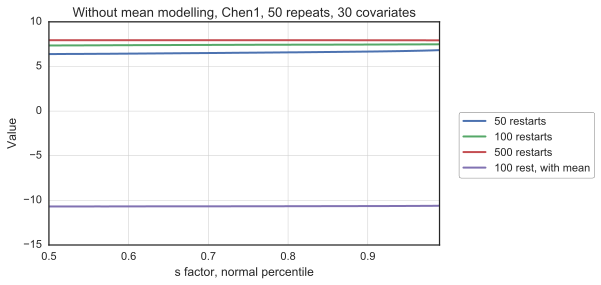

In [637]:
# df_data_restarts_1.groupby("fac").mean().sam.plot(label="1 restart")
# df_data_restarts_5.groupby("fac").mean().sam.plot(label="5 restarts")
# df_data_restarts_10.groupby("fac").mean().sam.plot(label="10 restarts")
df_data_restarts_50.groupby("fac").mean().sam.plot(label="50 restarts")
df_data_restarts_100.groupby("fac").mean().sam.plot(label="100 restarts")
df_data_restarts_500.groupby("fac").mean().sam.plot(label="500 restarts")
df_data_restarts_100_with_mean.groupby("fac").mean().sam.plot(label="100 rest, with mean")
# df_data_init.groupby("fac").mean().sam.plot(label="40% init")
plt.legend(loc=(1.05, 0.3), frameon=True, fancybox=True)
plt.title("Without mean modelling, Chen1, 50 repeats, 30 covariates")
plt.xlabel("s factor, normal percentile")
plt.ylabel("Value")

### Multioutput regression

### Slice examinations

In [448]:
get_data = ro.globalenv['Scenario1Enriched'] 
n_cov, n_train, n_test = 30, 50, 500  # data gen
s_factors = sp.stats.norm.ppf(np.arange(.5,1, .01)) # 50 factors evenly splitted
granularity = 50 
seed_good, seed_bad = 4, 3
def get_model(seed):
    ko_train = get_data(n_train, n_cov, seed)
    ko_test = get_data(n_test, n_cov, seed)
    preds, values, m = fit_and_predict( ko_train, ko_test, granularity, s_factors, pred_value_general)
    return values, m 
v_good,  m_good = get_model(seed_good)
v_bad,  m_bad = get_model(seed_bad)

In [380]:
m_good

GP_regression.,value,constraints,priors
mapping.linmap.A,"(31, 1)",,
mapping.constmap.C,-144.761389838,,
rbf.variance,7291.54386398,+ve,
rbf.lengthscale,"(31,)",+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


In [381]:
m_bad

GP_regression.,value,constraints,priors
mapping.linmap.A,"(31, 1)",,
mapping.constmap.C,-6.53916582397,,
rbf.variance,35.145292006,+ve,
rbf.lengthscale,"(31,)",+ve,
Gaussian_noise.variance,35.2389516771,+ve,


In [388]:
np.set_printoptions(suppress=True)

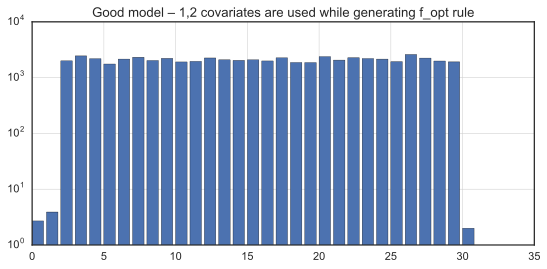

In [411]:
plt.bar(np.arange(31), np.round(np.array(m_good.rbf.lengthscale), 1))
plt.yscale("log")
plt.title("Good model. 1,2 covariates are used while generating f_opt rule")

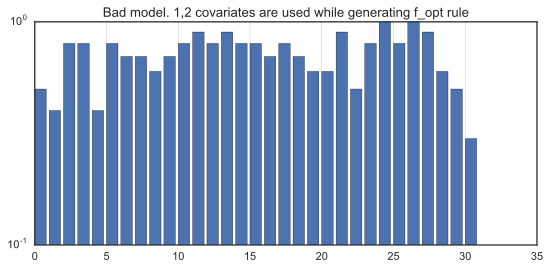

In [412]:
plt.bar(np.arange(31), np.round(np.array(m_bad.rbf.lengthscale), 1))
plt.yscale("log")
plt.title("Bad model. 1,2 covariates are used while generating f_opt rule")

In [446]:
get_data = ro.globalenv['Scenario2Enriched'] 
n_cov, n_train, n_test = 10,50, 500  # data gen
s_factors = sp.stats.norm.ppf(np.arange(.5,1, .01)) # 50 factors evenly splitted
granularity = 50 
seed_good, seed_bad = 17, 4
def get_model(seed):
    ko_train = get_data(n_train, n_cov, seed)
    ko_test = get_data(n_test, n_cov, seed)
    preds, values, m = fit_and_predict( ko_train, ko_test, granularity, s_factors, pred_value_general)
    return values, m 
v_good,  m_good = get_model(seed_good)
v_bad,  m_bad = get_model(seed_bad)

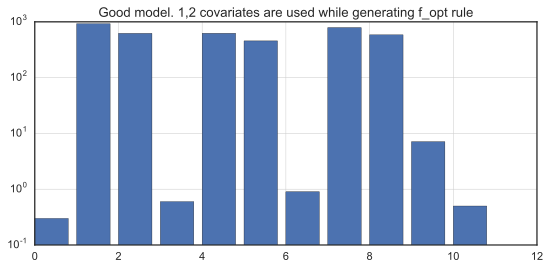

In [445]:
n = len(m_good.rbf.lengthscale)
plt.bar(np.arange(n), np.round(np.array(m_good.rbf.lengthscale), 1))
plt.yscale("log")
plt.title("Good model. 1,2 covariates are used while generating f_opt rule")

In [440]:
m_good

GP_regression.,value,constraints,priors
mapping.linmap.A,"(11, 1)",,
mapping.constmap.C,-4.16595313806,,
rbf.variance,79.1163178856,+ve,
rbf.lengthscale,"(11,)",+ve,
Gaussian_noise.variance,7.90234820417,+ve,


In [441]:
m_bad

GP_regression.,value,constraints,priors
mapping.linmap.A,"(11, 1)",,
mapping.constmap.C,0.592913717369,,
rbf.variance,41.1630187825,+ve,
rbf.lengthscale,"(11,)",+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


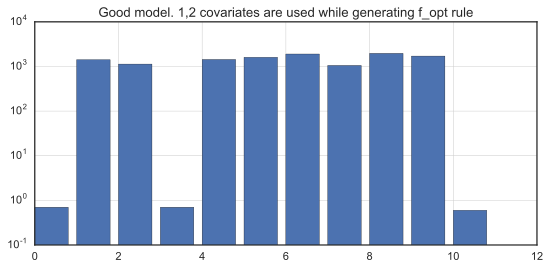

In [443]:
n = len(m_good.rbf.lengthscale)
plt.bar(np.arange(n), np.round(np.array(m_good.rbf.lengthscale), 1))
plt.yscale("log")
plt.title("Good model. 1,2 covariates are used while generating f_opt rule")

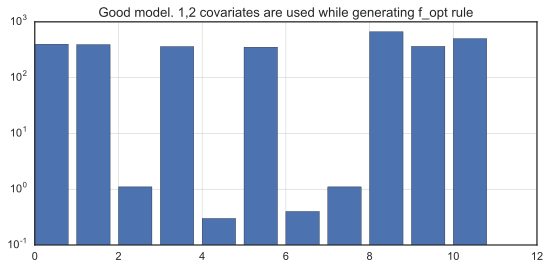

In [447]:
n = len(m_bad.rbf.lengthscale)
plt.bar(np.arange(n), np.round(np.array(m_bad.rbf.lengthscale), 1))
plt.yscale("log")
plt.title("Good model. 1,2 covariates are used while generating f_opt rule")

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1, 
                        shared_xaxes=True,
                        subplot_titles=('slice at -1', 
                                        'slice at 0', 
                                        'slice at 1.5', 
                                        )
                            )
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

### Brute force optimization

Chen 2016, Scenario 1

- 200 repeats
- test size 5000
- s : [0:2:0.1]  => 20 


In [259]:
get_data = ro.globalenv['Scenario1Enriched'] 
n_cov, n_train_samples, n_test = 10, [50, 100, 200, 400, 800], 100  # data gen
s_factors = sp.stats.norm.ppf(np.arange(.5,1, .01)) # 50 factors evenly splitted
n_repeats = 1
granularity = 50 
data = np.zeros((len(n_train_samples), s_factors.size, n_repeats))
for i, n_train in enumerate(n_train_samples):
    print(n_train, end=" ")
    start = timer()
    for k in range(n_repeats): 
        ko_train = get_data(n_train, n_cov, 777+k)
        ko_test = get_data(n_test, n_cov, 777+k)
        data[i,:,k] = fit_and_predict(
            ko_train, ko_test, granularity, s_factors, pred_value_general)[1]
    print("elapsed {:.2f} min".format((timer() - start) / 60))

50 elapsed 0.04 min
100 elapsed 0.05 min
200 elapsed 0.12 min
400 elapsed 0.36 min
800 elapsed 2.44 min


In [261]:
2.44 * 50

122.0

In [140]:
s = b'\x93NUMPY\x01\x00F\x00{\'descr\': \'<f8\', \'fortran_order\': False, \'shape\': (5, 8, 20), }      \n\x0ce,H\x15{&\xc0\x02~\xd6\x97\x91\xa3\x19\xc0^d\x9c\xa2\x9f\x9e4\xc0|MG\xac\xb2\xef\x1c@\x11\x87\x07\xefi\xc07\xc0\x83\xeb\x81XLV\x1f@u\x14b1d\x114\xc0}\xaf\x0cu\xf0\t\x1e@\x88\x7fN\x184\x1c%\xc0],X`\xcb\x88\t@\x94G\xe5\xb6\x88\x11\x0e\xc028\xf4\x84\x11=6\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0\xf42A`\xad\x894\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0Gi\x84< \xd9\x14\xc0do\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0AjT\x11\xfdr\x1d@\x11\x87\x07\xefi\xc07\xc02z6\x8e\xc4\x13\x1f@u\x14b1d\x114\xc0 2\x9e\xb0\x1dP\x02\xc0\xed\xfc)\xac_\xbe,\xc0],X`\xcb\x88\t@\xea\x17d\xf9\x93\x0c.\xc0Q]a:Al5\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0Nd\xf0Ul\xc26\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0\x13\xe8\x95\xf8qU\xff\xbf\xa4\x16\x17z`\x03\x00\xc0do\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0\x02\xdc\xa9Q\xdf\x97\x1d@\x11\x87\x07\xefi\xc07\xc0\xce\xe2\x99;\x8dI\x1f@u\x14b1d\x114\xc0}\xd4\rV\xc3\x1d\x1e@{Jx\x96}2\'\xc0],X`\xcb\x88\t@\x84\x80\x01[\x9ey,\xc0\x01%;\xc1\x0e"7\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0Nd\xf0Ul\xc26\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0\x88\xbe\xb1\xd4#m\x10\xc0do\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0\xac\x8c;\xb9y\xb2\x1d@\x11\x87\x07\xefi\xc07\xc0\xe6\xb1ml\t\x1f\x1f@u\x14b1d\x114\xc0\xa4\\=\xe9\xa7H!\xc0\xa5\xa5\xdf)\xa7\x83!\xc0\xce)\x1e\xaf\xb3\xc9\x0f@\x06\xb4qN\xae&\x03\xc028\xf4\x84\x11=6\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0\xf42A`\xad\x894\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0U\xbck9\xdb\xc6(\xc0do\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0\x96\x06\xab)\x7f\x87\x1d@\x11\x87\x07\xefi\xc07\xc0o\xab\x02\xc1(\xab\x1d@u\x14b1d\x114\xc05t9\xdb,{\x17\xc0\xa5\x83~\x12`\xf9\xf1\xbf],X`\xcb\x88\t@jG,\xf2\x16w\x0e@\x01%;\xc1\x0e"7\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0Nd\xf0Ul\xc26\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0\xce\x89\xd4\x86\xb4$\x1f\xc0\xe1\x0e\xae\x94\xd4j\x12\xc0^d\x9c\xa2\x9f\x9e4\xc0L.\xcb\xfc7Z\x1d@\x11\x87\x07\xefi\xc07\xc0\xe5?+\xad\x11]\x1f@u\x14b1d\x114\xc01)\xa4(\xae>\x10\xc0\x904\xdc\xf8\xf1w\x1f\xc0],X`\xcb\x88\t@\xc7\x8fc\x85\x9e\'\xf6\xbf28\xf4\x84\x11=6\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0Nd\xf0Ul\xc26\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0S\x89\xce\xab\xaa\xeb&\xc0do\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0\x9e,\x87\x82\xc1\xb7\x1d@\x11\x87\x07\xefi\xc07\xc0\xb1\xed\xee\xd1=6\x1f@u\x14b1d\x114\xc0\xc2\xad\xfe\xc7\xf6G\x1e@P*\xa275m5\xc0P\xa8Zx\xa9\xb91\xc0a-9I\xa34\x15@28\xf4\x84\x11=6\xc0\xf6L\x00T^\xe77\xc0\xb0:5\xe6\x01\xc66\xc0\xf42A`\xad\x894\xc0\xf2\xd5kZ\x8d\x087\xc0\x1c\xbe\xb0\xefR[/\xc0\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0\xdc\x97\xaeC\xfd\xec\xf4\xbfdo\xfe\xfd\x82\xe15\xc0^d\x9c\xa2\x9f\x9e4\xc0\xad\r\xc0\x0b\xe8\xb7\x1d@\x11\x87\x07\xefi\xc07\xc0\'\xcdzW\xbc\xe2\x1e@u\x14b1d\x114\xc0\xa0U\xac\xbe\xf0\xfa\x1d@L\x8f\xad3\x05\xba \xc0],X`\xcb\x88\t@\xa8\xc9\xe7o\x93\x8d\x00\xc028\xf4\x84\x11=6\xc0Na\xda\x9d\x10W7\xc0\xb0:5\xe6\x01\xc66\xc0Nd\xf0Ul\xc26\xc0\xf2\xd5kZ\x8d\x087\xc0\xf0[6\xa5W6\xfa?\x8e\xf7\x92\xab\xc4\xd97\xc0\xa9\x0c\x06iC#6\xc0:\xdf\xf8\x8e\xc7\xf13\xc0\xd9\x0bBp\xb3\xa7\x1f@\xfa\x94R,\x9d\xe4\x1e@MS\xe3\xbaG\x18 @\xd9M2}E)\x1f@-\xe8\xb4\x9cs\n\x1f@ \xea\x9f.i\xfc\x1e@\xdau\x86\xc4k\xb4\x1e@\r\x9a\x04P\xf5\xb9\x1f@)\xc6\x99\xaa.\r @\xb0\xb5|l^\xfa\x1e@\xebE\xc4\x13\xb7\x7f\x1f@\xcd\xe3\xf0\x1c\xe7\xe6\x1d@\x9b\x9d\xdc\xaf\xab\x13 @\xb1\x9b\xad\x9c\xdcS\x1f@\xfa\xd5s\x8b.g\x1f@\xb2Afz6r\x1f@\xdf_\x00\x87c\xa9\x1f@E\xc3\xca\xf9\x89\\ @<z\xb1\xe3\xb1/\x1f@\x11\xee\xbb\x9e\x98\xad\x1f@k0\xda\xfcA\xcd\x1e@\x0c\xfa\xeeI\xbf\xb9\x1e@*\x07\xa4^Y\xce\x1f@\xdeY\xdc\xc6\x859\x1f@\x01\xf3\x8e\n\xb9\xb1\x1f@T\x92bEu\xe8\x1e@\x93?\xb9U\xc6\x82\x1e@\x0eq\x82T\x93\xc3\x1e@i\xc9\x0b\xa2\x9f\x80\x1f@,Z\xb8\x99\xca\xe8\x1e@V\x99\x87\xca=\xd4\x1f@\x15\xa9[\x99_1 @O\xd8;\xb7v\x0b @B\xe3\x0e\x18\x0fT\x1f@o8\x13\x9d\x1bz\x1f@\xa4\x94\xc1\n\xa1p\x1f@\xb0\xa5E!\xc0\xa9\x1f@\xdfmy\xbd\xa9\xd1\x1f@c\xcbE\xdd\xf1=\x1f@\x07Y\xb4_n\xb1\x1f@\xc0\x83!\xf9{\x14\x1f@\xb7\x02\xfb0\xa1\x1a\x1d@\x9eU\xd2\xffK5 @\x82\xfa3X{\xe8\x1f@\xce\x9el\xd06\xbc\x1f@\xa2,cU0\xe5\x1e@`\xadl\xa8\x8e\r\x1f@x\x88\xa4}]\xb8\x1f@\xc1\xc8m\x81\xae\x95\x1f@\xab5\x18a\xc7\n @q\x886\xfe\x06\xd6\x1f@\x9a\x9cAZ\xa32 @U\x18\x99~\xd7\x06 @\x05\xf4*\xaf\xe3T\x1f@\xe5\xd7\x81l\x81h\x1f@\xfcK\xadC\x7f\xe4\x1e@\r\x1eP2\xf5\xa9\x1f@V\xa7\xfe8\x0eY @\x9ax;\x11O,\x1f@\xaa\xb3x=\x19\xb2\x1f@\x8f!~\xc6\x86\xa6\x1e@,\x01Xm\xef]\x1d@R\xf9\x9e9\xf44 @\xa0\xb7\xc6R|4\x1f@\x18L\xed\xca\x00\xae\x1f@\x1a\\l\x15;\xe7\x1f@\xb6\xa3\xe0P\xa1\x12\x1e@\xf4\x8e\x05iN\xb8\x1f@\xdd<%\x17{\x95\x1f@\xb6\x15\xca\n/\x0b @\xf4\xbdR\xcdp\xd0\x1f@\x8dx\xe0\xbe\x94\xbd\x1d@\xa5\x0fl$s\x0c @\xdb\x91\x9b\xf3*\x14\x1f@8\x90\xdd\xd7\xa7`\x1f@\x9a\xde>\xcehm\x1f@\x8fsG\x8b\x13\xa9\x1f@G\x90\xdb|r\x8d\x1f@L\xc6\xb4Z6V\x1f@\xa1\xc92\x01\xd9\xb0\x1f@\x1f\x94\x84\x19\xc6\xce\x1e@aV\r;.9\x1e@,\xbd}\x9e\xe54 @3y\x8b\x16\xce\x89\x1e@\x85jO\x84h\xb2\x1f@L\xf5\xd5}\xed\xdb\x1e@\x01%\x10\x07\xe9\xd3\x1e@/\xe6;\xeae\xb9\x1f@w"+A\x00\x06 @\xa9\x80\xe2\x10\xa7\x9a\x1e@\x8ee\xcb~t\xcc\x1f@VY\x16\xf9%1 @*\x8a\x1c\xe0;\t @\x16]\xf6m\x12\x0b\x1f@0\nB\xae\x01i\x1f@=o\xf1I\xde\x88\x1e@\xfc\xf8\xa6\xa6\x1e\xa8\x1f@\xe4\x01\x987\xf3X @\xb4\xe4)\xcb\xe22\x1f@\x07q\xb1\xa3z\xaf\x1f@\xb3}\xa4\xc6\x13\xfc\x1e@\xb0\t-\xf8\xa9p\x1f@\xa8u\\\xc3\xdd3 @\xec\xc7\x16U\xa6\xe7\x1f@\xb0\x1c\x84\xe3\xda\xdf\x1e@9\xbe\xe9\x8d\xe2\x03\x1f@\xa710"\xe4\t\x1f@\x95\xb2\x82\xd4\x90\xb8\x1f@\xcb\xf1Uhx\xb2\x1e@F\xc5\x8bzc@\x1f@\x8e\xa8\\\xc0\x14\xc8\x1f@a$\x93342 @Q\x0fVoD\x0e @\x86\xac\x95\xf8O\x01\x1f@\x97\x1a\x15\xa9\xa7d\x1f@\x8d\xa9 \xb1D\x8c\x1e@\x88\x83\x90\'\x93\xa9\x1f@b2\xaf\tWc\x1f@.\xda}\x87|>\x1f@?WK\xe3I\xaf\x1f@\xf6\xde\xecH\x05\x13\x1f@\x9c\xbb\xc2\xb4\x90\x91\x1d@\xef\xb3\x88\xe3b3 @\xc0\x8d\xdb\xaf\xc87\x1e@OA\xef\n\xeb\xa9\x1f@\xabV\x16W\xd5\xea\x1e@\xaaTi\x00\xe2\xea\x1e@\x0fD\xae\xeb\xbf\xb8\x1f@\xbe\xd7\x1d\xf8\xdf\xa3\x1f@Z\xf5\xd1\xda\x0fa\x1f@\xb3\x95-\xbf\xca\xd0\x1f@\xf7\x00\x07\xf5\x112 @\xe8\xbb\xaeJW\t @s\x08O\x08\xc6T\x1f@\x1bs\xf4\xa0eb\x1f@\xee\xff\x86\xc1Xg\x1f@\x98\x85\xd6\x80s\xa8\x1f@\xab\xb7z. Y @\x9f\x90%\xac\xf0 \x1f@%Z\xfb\xc2\x13\xb2\x1f@0Wi\xb2\xfax\x1e@6zmg\xd2b\x1d@\xee\x89~\xe083 @\x90\xc7\xc0\xe2\x0f\xe8\x1e@(\r\xc4BO\xbc\x1f@\x0c\x9b\x16\xc3;\xe3\x1e@\xd2\x0e\x16\x02D\xaa\x1e@Z\xc9\r\r\x0c\xb6\x1f@\x8c\x83\rf*\xaa\x1f@\x93\xe8mk\x91]\x1f@\x99\xf3\xc40\xe5\xce\x1f@\xd9\xae\xa3D\x152 @S\xa0s\xeb\xef\x13 @\x8e\xa0YP\x83S\x1f@pk\xd2\xbdnt\x1f@zmye\xb4h\x1f@\xd5\xb1r\x80c\xa7\x1f@~\xbe\xd3\xd2_P @\xb8\x06<\xdc$4\x1f@\xa9\xb7=\x00B\xad\x1f@\xa1\xf8\x9b\xe5\x86\xb1\x1f@\xa3\xbb\xcd\x102\xa2\x1f@\t\xf1\x87\x1c\xba= @h\xdc6\xca\xc5\xff\x1f@\xed\xa0\xf5"t\x00 @\xab\xdc\x14m\x04\xfb\x1f@\x08D\xf8UU\xaf\x1f@;\xcd\xe9\x90\xa3\xb8\x1f@\x8a\x007Gv\xba\x1f@\xd8$\xdfm\xc6\x11 @&\x05\xbe\xc8\xaf\xd5\x1f@J\x7fk\\\xd92 @W\x18XO3) @\xee\xc8\x8b\xff\x1dK\x1f@r\x84\x18^\xf0\xad\x1f@\xdc\x9b67"w\x1f@\xc1\x1eo\xfb\x81\xac\x1f@\xbe2\xe9\xcf\xb1` @\xc6\xacb\xb5|X\x1f@\xbf\x08 wo\xb5\x1f@\xab\x8d\x8c\xd0\x8b\xb1\x1f@\x8e\xa8Grt[\x1f@\x88\xa6\xc0\x90\xc5= @w\xe3z\xb3\xbd\xff\x1f@\x1a\xc1\x06\xe7N\x00 @\xaa\x05\xe4\x99B\xfa\x1f@\xee\xc1\xc0p\xed\xaf\x1f@M|\x97\xeb\x0e\xb7\x1f@\xa3\xf8o\xfaB  @\r\xf9\xc8\x8f\x98\x11 @@\x8c_\x19\t\xd7\x1f@\xb6*\xd0(\xaf2 @UQw\x89\xa6) @\xb8\xef\xac\x9c\xab\xc1\x1e@\x8c@\x9e\x93/\xae\x1f@u\x92\xb6\x95\x0bw\x1f@\xdb\'\xa0\x97\xb5\xab\x1f@\x81|z\x8e\xed_ @{,P\x9c\xabY\x1f@"\x9a\xcfa\t\xa0\x1e@\xc2\x91\xc1\xd5`\xb1\x1f@\xec\x05\xcc\x0bS\xa2\x1f@<\xafK\tA\x92\x1f@$\x8eq\xc3\xb0\xff\x1f@5f+\x91i\x00 @\x9e|\xa5\x82\xe4\xf9\x1f@^\x18\xd2\xd8\xc3\xa8\x1f@\xf2\xbb\xbd(K\xb8\x1f@\xeb\xf5>\xc1\xee" @\x81o=\x9c9\x11 @\xdb\x82\x0e\x83\x95\xd2\x1f@\xd2)\x19 \xe52 @B\xab\xfa\\m) @\xa2\x11SR\xddC\x1f@\x97\x94}\x02\x95\xac\x1f@\xaa\xbe\xb7\xdc#v\x1f@yn\x91\x8c\xee\xaa\x1f@f\xce\xdb\xa3ta @\x85\xce\xb3\xd0\xd5V\x1f@\xa6\x08\xe9\xdal\x80\x1e@k@\xc2\xc3\xc8\xb1\x1f@\xb0I\x9d\xb3\x80\xa1\x1f@\xf7\x06\xc7\xdam= @|\xff\xb9\xeb\xdd\xfd\x1f@\xea\x00\x0e\t9\xff\x1f@\x18\x93\xf6\x9b9\xf9\x1f@`\xb6\x19PY\xb1\x1f@\x9f\x96Zc\x13\xb7\x1f@\xd14\x9a=\xe4! @\xf6\x99\xecmB\x11 @\xe8\xb6S\x96\x83\xd2\x1f@3\xd4\xc2J\xee2 @Dqr`\xc4) @QmY\xbdTA\x1f@.\xa55\xc8\xe3\xac\x1f@\xc2\xd5\xac\x86Rw\x1f@"_N\xd7I\xac\x1f@\xda\xa1wm\x91] @\xc1\xa5\xfb \xc3X\x1f@\xf3\xf2\xf3\x06D\xb4\x1f@\\f\x1f\xa4!\xaf\x1f@\x9c%\x03\xa1y\xa1\x1f@\xec\x89\x03\x86\xe2\xf0\x1f@\x97\xd1\x94\xd1\xbd\xfe\x1f@\x98\tw(-\x00 @\xba\xbc<\x17\xdb\xf9\x1f@\xaf\xd7\xe4\x1c%\xb2\x1f@G\x13\xf5d\x97\xb8\x1f@\x01\xfbC\xc8k! @\xa0\x1b\x19\xe7\xfa\x11 @D\x8d\xf8H\xa5\xd0\x1f@RWG\xed{2 @N\x8d\xbd\xae}) @\xff\xceNcT\x05\x1f@\xc7\x8c\xa0U\xa2\xac\x1f@\xa4<\xf2\xd4\\v\x1f@\xd8\xda>}B\xac\x1f@\x9e;( \x9d` @\xa7\xb2\x00]\xe9X\x1f@\x10(\xf5\x0bR\xb4\x1f@&(\x8a\xebd\xb0\x1f@\xef\xeaj\xd5:\xa2\x1f@\xb0=Ot\x87= @\xde\x95\x16~\xb2\xfe\x1f@\xfa\xb3&\xefY\x00 @\xa3h\xaf\x8f\xf6\xf8\x1f@\x0f \xc8e]\xb0\x1f@9y\xe8\xfed\xb7\x1f@\x9f\xaf\x8d\xd15# @\x8e\xd3\x97\tx\x11 @\xb6\x7f\xecV\xa8\xd5\x1f@45\xf6\x1et2 @n\xdf\xb3\xd1\xd6) @\xe6\x00\xf2\x82TG\x1f@\x97Df\xc5\xf9\xac\x1f@\xc5\xe4\xdf\xb9G\xc5\x1e@DZ\xbd\xe1\xf0\xab\x1f@{o\xe6\xe9\x93] @\xdcVw\x1d\xd5W\x1f@\xc9\x82,\xd31\xb4\x1f@,\x10;^\xd4\xad\x1f@\xce3\x9e\xc9\xa2S\x1f@\xdc\x84A,J= @^7\x17("\xfd\x1f@~y\xd5\xd5\x85\xfd\x1f@\xe0\x14y\xbc\x90\xf5\x1f@"\xcd,|g\xaf\x1f@*\x1f}\x1e\xab\xb8\x1f@\x90=@\xd9T\xbe\x1f@\r\x1e@\xa7\xa6\x11 @\x1e=\x96\xbb\r\xd4\x1f@\xbd\x96P\xd3U2 @\x1d\xf4\x88[\xbb) @\xf8G?\xfc\x8cM\x1f@\xaf\xa2\x12\x01p\xac\x1f@\xebT\xdd\xf1\xe6\xc4\x1e@\x80\xc8Ag\x92\xac\x1f@bY\x93\xa1\xea\\ @\xf9\n\xcb\x93\xafW\x1f@3!_\xaeY\xb5\x1f@\r\xce\x8c\xce\xb2\xb0\x1f@q\xb3Lu^\xa1\x1f@V\x03u/\x02= @\xf9\x8aF\xaf\xb5\xf9\x1f@d\xfb3\xc7c\xfe\x1f@"\xa7\x9d\x80\\\xf4\x1f@\x9eW\x7fJ\xb0\xaf\x1f@)M8q\xb1\xb8\x1f@<\n\xae\xff\x0e  @I`\xd9\x86E\x11 @\xf7\x9a\xdc\xb2\x1c\xd6\x1f@\xf0^\x14Gx, @\xa9f\x82]E) @N\xf8\xc1\xc0\n\xf8\x1e@<\xac\xfa\x8cM\xac\x1f@\xbdv-\xe0\x8ct\x1f@,\x9d\xe3AT\xab\x1f@\x90\xe1\x05iQ\x10 @\xf5\x8ew\xf7\\T\x1f@\x95\xed\x8ehu\xb3\x1f@\xecr\xf0\xc7\xe7\xb1\x1f@\x93\x8d\x19y%\xa3\x1f@\x03]|.\xb6= @\xde5\xe2\x0c\x7f\x02 @1\xdd\xb1\xec\xbe\x00 @\x07\x9e6r\x1a\x04 @\xa3\xcb\xd1!\x1e\xb6\x1f@XH\xf6=\xd4\xb9\x1f@\xf1\xd9\x0e\xc6\xe1$ @\x80\xd1\x94\x91,\x10 @\xa6\xdf\'\xd4\xa3\xd9\x1f@\xe0\xe7\xef\n\x1e3 @\x1d\xef\xad.A+ @\xec\xabZo.\\\x1f@\x11\r\xd3|\'\xb0\x1f@\xbe\xc3Bw5w\x1f@\xa1\xb0\xae"\xfc\xad\x1f@\x0c\xc3TMUc @I@\xc7\x89\xb8\\\x1f@\xa3?\xa7\xd1\x9f\xb8\x1f@|\x00n\xbd\xc6\xb1\x1f@\xec\xf4\xb3\xccl\xa3\x1f@,\xdaz?S> @<\x027\x87\x95\x01 @\x11\x9b\xa9a\xa9\x00 @(: \xc1T\x04 @\xfby\x0f\x9d\x0b\xb6\x1f@\xc8\x9d\x19\xcf\xb8\xb7\x1f@\xb5c\x18\xb7\x92$ @XZX\xfa\xa4\x11 @\x04\x11\xb1u\xfa\xdb\x1f@W\x8c\xab\x19\x053 @\xf1A\xd7\x88\xa7* @:2b\x9c\x05\\\x1f@\xb1\xf2\x00TJ\xb0\x1f@\xa0;K\x9b3x\x1f@\x98\x04;\xce\x94\xae\x1f@3x,\xd0;c @Wv[@~\\\x1f@vh\x83\xac\x1e\xb8\x1f@1\xe0k\xc0\xb4\xb1\x1f@\xfc`5q\xd6\xa2\x1f@\xea\xb8\xf2@\xbd= @\xa8(\xe9*\xcc\x02 @\xe8\xb1uG\xc6\x00 @{\xe3,`\xbd\x03 @w\xff_\x85\x10\xb6\x1f@B@r\xa16\xb9\x1f@\xd7\xf5^\xcb\xd5$ @\x1dcq[\xf8\x11 @U\xa9H\xe8\x07\xdc\x1f@\x08U\xb0s\xd02 @V\x8aq\xff\x9c* @\xc5,\xfd\xa0u\\\x1f@\xf7Xkl@\xb0\x1f@42\xffV!x\x1f@\x18\xe6&\xedn\xae\x1f@\x9f\xe9\xdd\xd0-c @\x00\xb6\xac\xd9\x86\\\x1f@\x1c0\\\r\x91\xb4\x1f@4\xf7F\xf9\x00\xb2\x1f@(\xc8\x0f\x83\x97\xa2\x1f@\x0f\xf1\xe4\x85`= @\x98s\x81\xd6E\x02 @\xe2Z\x1b\xf4\xb8\x00 @~\xc8\x14\x07 \x04 @\x15\xf1\xcc\xa1\xd6\xb5\x1f@;Mp\x06\\\xb9\x1f@\x99H\xc0\xae\xc1$ @,\xc5\xf5\xeb\xf3\x11 @\x8f\x93\xd30\x1d\xdc\x1f@\xf3\xa6\x16{\xf22 @(\x057\x9a\xfb* @GZ\xf3\xb9\xf2\\\x1f@\xbe\xfe\xe7\xbb^\xb0\x1f@\x01\x069N5x\x1f@\x06\xc5\xe9\x87Z\xae\x1f@fb\xa4\xa74c @\xf1\xec\x19F\xe7[\x1f@\xea\x9f\xd4\xe8\x08\xb7\x1f@bMm\x9c\xc2\xb1\x1f@\xf1\xa4\x96\x7f\xbb\xa2\x1f@\xa3\xf0\xf58{= @\x94#\xd0\xfa\x08\x02 @"(\xa3*\xda\x00 @\x86_\xaf\x90T\x04 @]\x87&n\xcc\xb5\x1f@\x92ct\xc4t\xb9\x1f@`\x94\xa9\x1b\xfa$ @\x06\x1f\xa8:\xe8\x11 @{\xb1\x18y\x1c\xdb\x1f@\xa1@md\xe92 @g\xebs~\xb2* @4\x0c\xc9-<\\\x1f@\xfb\x12\xdd\x037\xb0\x1f@4F\x8a\x12@w\x1f@\x836qge\xae\x1f@\x8doh\x8c4c @\x87\xb7\xd1\xf2]\\\x1f@\xec\xb3\x96\xce\xc9\xb4\x1f@X8\xaer\xbd\xb1\x1f@\x97\xc2\xd6\x0fn\xa2\x1f@=\x8c4\xf9\xbb= @-\x9b\xc5Y\x84\x02 @\x00\xb3X\x1a\xaa\x00 @qo\xb9\xcc\x97\x04 @\xa3\xd4$\xb0\x91\xb5\x1f@t\xb7\xcd\x8el\xb8\x1f@\xba\xeb\xe5\x10\xf9$ @\xfd\xd1\x95h\xe7\x11 @d$1\xcdC\xdb\x1f@\xaa\xb0\x0f\x11\xf12 @t\x83\xfa\x0f\x9b* @\x18\xf8En\xee[\x1f@\xc0p\x10\x80\xff\xaf\x1f@Qr\x1b\xdf\x1dw\x1f@\x00\xa0\x99\x07S\xae\x1f@\xb8\xda\x00\xb1Rc @\xc2e\x7f\x91\x81\\\x1f@W\xed\xb0\x064\xb7\x1f@v7\x89F\x12\xb2\x1f@\xd1O\xe6aW\xa2\x1f@,\x0c\x06\xa5\x93= @\xa3v\xccp\x99\x01 @Q\xe6G\xd3\x1a\x00 @`g\x05%f\x04 @\x88\x0e\xce\xe7,\xb2\x1f@`\x02\r\x03\x7f\xb8\x1f@\x95\xe4\x9a\x9a\xa9$ @R\x89H\xbe\xdd\x11 @\xc0hw\xf9&\xdc\x1f@\xe7\xb6G\xe2\xe52 @\xa7~\x91\xaf\x14+ @\x83\xd1~\xe3\xa5[\x1f@\xc0U\xd7\x13(\xb0\x1f@\xbfk\\\x95\x15w\x1f@\x1e0\x98\x8e\x03\xae\x1f@\xaf\x18u\xe53c @\xbb\x89t\xbe\xd0\\\x1f@\xfe\x03\x87\xc8\xfe\xb7\x1f@\xa7{+4|\xb1\x1f@I\xaa.\xcb\x11\xa3\x1f@\xab\x9eo\x1e\x9c< @"j\xf6{\x0c\x02 @8\xaf\xb4\xc0\xa9\x00 @^\x80CV\xf7\x03 @\xde\xbc\x97\xb6q\xb6\x1f@\x88\xff=\x9f\xe0\xb8\x1f@\x93\x89k\x99\xcb$ @\xaeU\x10w\xaf\x0f @0\r\x07c\xa8\xda\x1f@\x9a\x96\xaaT\xe22 @\xffZ\xf5\xa6\xc1* @\x86\xae>\x87\x0e\\\x1f@\r\x14\x95I\xb1\xaf\x1f@p\xa1\x90ulw\x1f@6\x11\x1bZ/\xae\x1f@I\xab\x85\xa4Nc @\x8e\xf2\xc1\xb7\xb9[\x1f@8J]\xe4\xa7u\x1e@\xc0N\xd3\x14\x7f\xaf\x1f@\x0f\x0c\xa6R\xd6\xa2\x1f@\x8dT5kX> @\xf2Go%M\x02 @\xbd\xad~;\xb4\x00 @H\x18\x86w\x04\x05 @Ap\xf3+-\xb6\x1f@Q\x82\xe2\xa03\xb9\x1f@\x1a\xd24\x15\x1f% @\x1aw\xcd\xcaU\x12 @\x98F2\xd1\x94\xda\x1f@\x88\xac|5\xb32 @(s\t\xceP+ @\xdc\x1d\x9a=\x15]\x1f@k\x8eb\xe0\xac\xae\x1f@\xdd\xd2I_\x97w\x1f@y\xd9\xe0#`\xad\x1f@\xe5\xbb\x10\x98\x8db @\x8c\xee\xa2dE_\x1f@\xbd\\\xb5\x9aF\xb7\x1f@\x19%\xf9\xe4P\xb0\x1f@\xc5\xffG\x92/\xa2\x1f@X-5\xb7v> @\xa8h\x1b@\xad\x02 @\x17\xdde\x90\xae\x00 @\x17=\xb0Y\xff\x04 @\x83\xfa\x94\x96\x93\xb4\x1f@\x8b\xa4\xf4\x9fo\xb8\x1f@bp\xfa+\x04% @Q\x1f\x1c\xd39\x12 @^\xaa\x0ed\xc2\xda\x1f@\xf1\xcb\xc0:\xc42 @\x17\xeb\x93\x10P+ @\x11\xc1\x1b\x8b\xa8]\x1f@\xa1\xd5\x0ebe\xaf\x1f@T\x8e+\xd6\xcew\x1f@\xea\x1c\x01$\xe7\xae\x1f@\xca\xc1!\xa1\xe8b @\xa6\x94\xe0\xefg_\x1f@D\xb3\x12\xc6*\xb7\x1f@.\xba]d\x01\xb1\x1f@\xcd\xb8\xa46\x19\xa1\x1f@\xab\x9f\xaa\x8f\x85> @\x98\x95\x92\x84\\\x02 @3\x02\xc1\xb9\xb3\x00 @\x95\xe3\xa3\xfb\xc5\x04 @\xd5\r\xdd%/\xb5\x1f@06\xe2\x19\xd3\xb7\x1f@\xb1\xd1\x80\xc1\x03% @\xaf\\\x97\xae\xf6\x11 @\xe2\xc6\xda\x95\x96\xda\x1f@vE\xca\xa8\xe92 @\xf7\xba\x8a\xdfZ+ @\xae\xfat\xd1r]\x1f@\xe8\xe2\rc\xf6\xae\x1f@\x8e\x00\xcc\xf2\xe1w\x1f@\xc1h\x7f\xa6\x1c\xaf\x1f@3Ya`\xe4b @\xee\xb1e&\xb9_\x1f@\x86\xcf~\xe2>\xb7\x1f@?e\'\xa4T\xb0\x1f@\xbf\xa6eg\xeb\x9f\x1f@\x0b\xb5\x17\x10y> @1\xcej\'\x96\x02 @\xe8\xae\xea\xa0\xc8\x00 @[eX\xb0\x01\x05 @\x02\xe0\xe7,r\xb6\x1f@\xc7\x9b\xec\xad)\xb8\x1f@\xb3\x0b\x95l\x02% @\x05\x81;p\x13\x12 @0b\xbe\xabj\xdb\x1f@g@\x1c\xc1\xd32 @\xb9\xd5S\xb03+ @\x83\x1dpO\xb7]\x1f@\xaa\n\\\x96\xc8\xae\x1f@\x8bH+_\xd3v\x1f@\xedK\xa7\xb6\xec\xae\x1f@\r\\;\xa2\xe7b @\x1b\x17\x17\xdfp_\x1f@\x12\x18:*\xe6\xb6\x1f@Wm\xf1\xec\xa9\xab\x1f@\x95V4n\xa6\xa1\x1f@\xa0\x8f\xca\x9e\x87> @i\xd1\x0ekI\x02 @\xca4\xb2\x17\xb6\x00 @N\xce\xdbZ,\x05 @\x85\xed\xc8\xb1T\xb5\x1f@\x04\x16;\x9e\x16\xb9\x1f@\\\x12\x88\x94\xf2$ @\xeaG^]\xf9\x11 @\xb2M\xe4\x10R\xdb\x1f@\x10\x8e\xd0\xac\x033 @\xda\xf0\xc1\xa8Q+ @:\xfcn\xe9\x91]\x1f@\xc3\xd6\x83\xf2\x07\xaf\x1f@X\xd0?\xecpw\x1f@1\xc8\xd2\xfe\x0b\xaf\x1f@\x8f\xa2\xe6\n\x97b @\xa5]f\xdfb_\x1f@\x0b\x8dU\x03\xaf\xb6\x1f@]\xd9\x15\xa1\x0b\xad\x1f@7\xf1\xf0v\x94\xa1\x1f@\xff\x8c,\x81s> @\xcdf7w&\x02 @\xcb[\xb3+\xb3\x00 @\x85E\xdcG\x82\x04 @\x8c\x85\x18\xafL\xb6\x1f@\x18\x0f\x9b\xf7\xaa\xb8\x1f@\x1e\xd5\xa9\xd0\x04% @\x19\xf5\xc6\xa3\xdf\x11 @!lYT\x18\xdb\x1f@\xc5q\x91\xad\xeb2 @\xa2\x01\xcc|E+ @\xe9k]\xa4\xb9]\x1f@,\xc1\x1a\xdd\xd7\xae\x1f@\x99o\x8e[\xd5v\x1f@\xd6\xbeo\xe0\xb7\xae\x1f@[O\x01\xba@b @\xfc \x8e\\\xa7_\x1f@\x92L\x98\xdcN\xb7\x1f@=\xfe\xc4\xa0\xcd\xb0\x1f@iW\xd7b\x99\xa0\x1f@\x93S\x1d\xfda> @\xce\x8c\xd3\xb9k\x02 @\xb2\xf6\x8a\xcd\xb5\x00 @\xd0\xc4|\xfe\x03\x05 @\x14G\x9e\xb9\x14\xb6\x1f@a=\xa5\xc9\x85\xb8\x1f@"\x85\xaf\x1a\x06% @C^w(\xbf\x11 @J\'t\xf4\x93\xda\x1f@\xca\xcb\xe8(\xfd2 @\x14y\xb6\xad^+ @\x95$\\u\x81]\x1f@\xe0\xf5\x9e\xa5\x91\xae\x1f@\x18\x0b\xd2\x12 w\x1f@Nw%\xa0\xc1\xae\x1f@\xc1\xdb\xd1~hb @H\xb3\xd3~C_\x1f@-\xda\x85\x0e;\xb7\x1f@n\xad\x94\x17i\xb0\x1f@\xde\xdc_\xc4\xa2\xa2\x1f@j1(p6> @\xa6\x0e)_E\x02 @\xb0\x92\xd1i:\x00 @\xd7\x18!g(\x04 @\xd9\xf5\xc9\xe5\xdc\xb4\x1f@\xa8:\xfa\xe3\x19\xb9\x1f@D\xc1).\xfd$ @)\xf9\x03S\x15\x12 @\xf9yD\xfa\xde\xd9\x1f@\x12\xcd\x14\\\x822 @\xf7\xff\x93\x94\xe9* @&T\xc7.\x8a]\x1f@\xf3j\xcf\x00\x87\xaf\x1f@J\xe6\xb5\xee5w\x1f@Y4.\xe6\xbf\xae\x1f@V\xf1\xc3\xb7\xcdb @13KE&_\x1f@\xf4\xfa\x07\xcc\xae\xb6\x1f@'

In [142]:
with open("/tmp/bla", "wb") as f:
    f.write(s)

In [144]:
np.load("/tmp/bla").shape

(5, 8, 20)

In [139]:
pd.read_csv("/Users/ipaulo/Downloads/results.csv")

,0,1,2,3,4,5,6,7
0,-13.236566,-14.120618,-14.271563,-14.256987,-14.055856,-13.404574,-15.146317,-12.533105
1,7.855229,7.847672,7.884087,7.830743,7.852754,7.856793,7.863492,7.861280
2,7.969270,7.952038,7.948470,7.974663,7.965216,7.966510,7.955688,7.961810
3,7.979548,7.979625,7.979548,7.979659,7.979439,7.979542,7.979284,7.963413
4,7.979705,7.979820,7.979740,7.979717,7.979556,7.979495,7.979647,7.979496


In [122]:
np.save("/tmp/chen1res", chen_1_results)

In [126]:
get_data = ro.globalenv['Scenario2Enriched'] 
n_cov, n_train_samples, n_test = 10, [50, 100, 200, 400, 800], 1000   # data gen
s_factors = sp.stats.norm.ppf([.5, .525, .55, .6, .7, .8, .9, .99])
n_repeats = 5
granularity = 50 
chen_2_results = np.zeros((len(n_train_samples), s_factors.size, n_repeats))
for i, n_train in enumerate(n_train_samples):
    print(n_train, end=" ")
    start = timer()
    for j, s in enumerate(s_factors):
        for k in range(n_repeats): 
            ko_train = get_data(n_train, n_cov, 777+k)
            ko_test = get_data(n_test, n_cov, 777+k)
            chen_2_results[i,j,k] = fit_and_predict(
                ko_train, ko_test, granularity, s, pred_value_general)[1]
    print(" elapsed {:.2f}".format((timer() - start) / 60))

50 

 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:129: RuntimeWarning:overflow encountered in square
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:130: RuntimeWarning:invalid value encountered in add
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


 elapsed 0.78
100 

 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:229: RuntimeWarning:invalid value encountered in true_divide


 elapsed 1.11
200  elapsed 2.09
400  elapsed 8.26
800  elapsed 45.52


In [132]:
np.save("/tmp/chen2res", chen_2_results)

In [133]:
get_data = ro.globalenv['Scenario4Enriched'] 
n_cov, n_train_samples, n_test = 10, [50, 100, 200, 400, 800], 1000   # data gen
s_factors = sp.stats.norm.ppf([.5, .525, .55, .6, .7, .8, .9, .99])
n_repeats = 5
granularity = 50 
chen_4_results = np.zeros((len(n_train_samples), s_factors.size, n_repeats))
for i, n_train in enumerate(n_train_samples):
    print(n_train, end=" ")
    start = timer()
    for j, s in enumerate(s_factors):
        for k in range(n_repeats): 
            ko_train = get_data(n_train, n_cov, 777+k)
            ko_test = get_data(n_test, n_cov, 777+k)
            chen_4_results[i,j,k] = fit_and_predict(
                ko_train, ko_test, granularity, s, pred_value_general)[1]
    print(" elapsed {:.2f}".format((timer() - start) / 60))

50 

 /Users/ipaulo/anaconda/lib/python3.5/site-packages/GPy/kern/src/stationary.py:229: RuntimeWarning:invalid value encountered in true_divide
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/ipaulo/anaconda/lib/python3.5/site-packages/paramz/transformations.py:111: RuntimeWarning:invalid value encountered in greater


 elapsed 1.00
100  elapsed 1.06
200  elapsed 3.10
400  elapsed 9.15
800  elapsed 42.67


In [134]:
np.save("/tmp/chen4res", chen_4_results)

In [76]:
res_array = np.zeros((s_thresholds.size, len(n_train_samples), n_repeats))
for i,s in enumerate(results.keys(n_train_samples)):
    for j, n_tr in enumerate():
        res_array[i,j,:] = np.array(results[s][n_tr])

In [81]:
np.arange(25).reshape((5,5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [87]:
res_array.mean(axis=-1).shape

(10, 5)

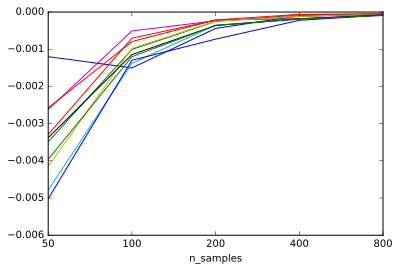

In [90]:
plt.plot(res_array.mean(axis=-1).T)
plt.xticks(range(len(n_train_samples)), [str(o) for o in n_train_samples])
plt.xlabel("n_samples")

In [112]:
import pandas as pd

In [115]:
df = pd.DataFrame(res_array.mean(axis=-1))

In [117]:
df.columns = n_train_samples

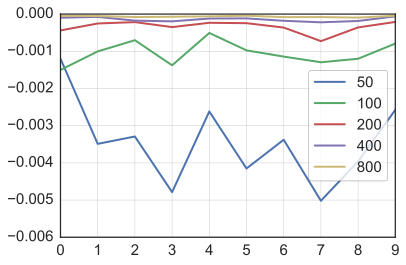

In [128]:
for i, ntr in enumerate(range(res_array.shape[1])):
    plt.plot(res_array[:,i,:].mean(axis=-1), label=n_train_samples[i])
plt.legend(loc=0, frameon=True, framealpha=0.8, fancybox=True)

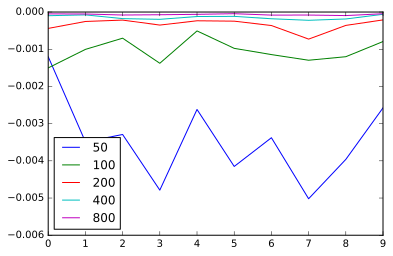

In [118]:
df.plot()

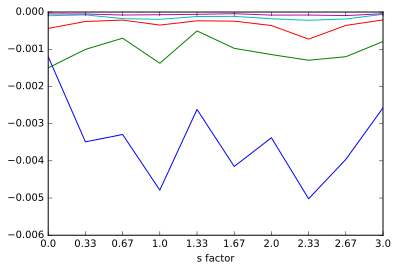

In [108]:
plt.plot(res_array.mean(axis=-1))
plt.xticks(range(len(s_thresholds)), [str(round(o,2)) for o in s_thresholds])
plt.xlabel("s factor")

In [53]:
A_pred = get_brute_treatment_prediction(80,0,1,X, R, C_test, .1)
value = pred_value_general(np2r(A_pred), test)[0]

In [52]:
get_ko_learning_value_and_predicted_dose(ko_train, ko_test);

.
.
.
.
*
.
.
.
*

optimization finished, #iter = 7244

obj = -356.842184, rho = -1.014858

nSV = 539, nBSV = 178



### Optimization questions

In [337]:
ls_c, ls_a, sigma_2f = m.rbf.lengthscale[:-1], m.rbf.lengthscale[-1], m.rbf.variance
Kc = get_kc_exp_covar(ls_c, C_test[0, :], C, sigma_2f)
alphas =  np.diag(Kc) @ m.posterior.woodbury_vector 

### Sparse GP regression

MSE =  32.6051300664


sparse_gp.,value,constraints,priors
inducing inputs,"(4, 1)",,
rbf.variance,0.0776385560944,+ve,
rbf.lengthscale,1.32334693072,+ve,
Gaussian_noise.variance,0.27065284843,+ve,


 /Users/ipaulo/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


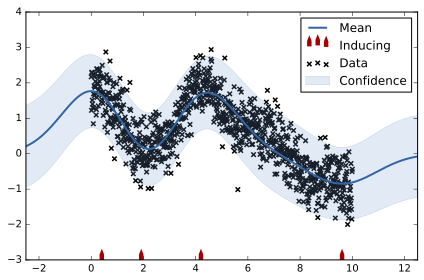

In [57]:
N = 1000
noise_var = 0.05

X = np.linspace(0,10,N)[:,None]
k = gpy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

n_of_inducing = 4
Z = get_uniform_inducing_points(n_of_inducing, X)
np.hstack((np.linspace(2.5,4.,3),np.linspace(7,8.5,3)))[:,None]
m = gpy.models.SparseGPRegression(X,y,Z=Z)
m.optimize()
m.plot()
print("MSE = ", np.mean( (m.predict(X)[0] - X)**2 ))
m

### Old stuff

In [35]:
gammas  = np.outer(Kc, Kc)
o = var_profile(space, A, ls_a, gammas, m.rbf.variance)

NameError: name 'var_profile' is not defined

In [25]:
Y = R 
Kxx = m.kern.K(X)
# add to diag elements, have no idea why to add 1e-8 (num stability?)
Kxx.flat[::Kxx.shape[0]+1] += m.likelihood.variance + 1e-8  
Lambda = np.linalg.inv(Kxx)
Y_res = Y - m.mean_function.f(X)
Wvec, Wchol =  Lambda @ Y_res, np.linalg.cholesky(Kxx)
Kxtx = m.kern.K(X_test, X)
means_test = Kxtx @ Wvec + m.mean_function.f(X_test)
tmp = np.linalg.inv(Wchol) @ Kxtx.T
vars_test = (m.kern.Kdiag(X_test) -  np.square(tmp).sum(0)).reshape(-1,1)

assert np.allclose(Wchol, m.posterior.woodbury_chol)
assert np.allclose(Wvec, m.posterior.woodbury_vector)
means_true, vars_true =  m.predict_noiseless(X_test)
assert np.allclose(means_test, means_true)
assert np.allclose(vars_test, vars_true)

In [ ]:
def predict_GP_by_hand(m, X_test, sparse=False):
    if sparse:
        Kxtx = m.kern.K(X_test, m._predictive_variable)
        mu = Kxtx @ m.posterior.woodbury_vector
        # this block is from original library 
            Kx = m.kern.K(m._predictive_variable, X_test)
            mu = np.dot(Kx.T, m.posterior.woodbury_vector)
            if len(mu.shape)==1:
                mu = mu.reshape(-1,1)
            if full_cov:
                Kxx = m.kern.K(X_test)
                var = Kxx - np.dot(Kx.T, np.dot(m.posterior.woodbury_inv, Kx))
            else:
                Kxx = m.kern.Kdiag(X_test)
                var = (Kxx - np.sum(np.dot(m.posterior.woodbury_inv.T, Kx) * Kx, 0))[:,None]
        # end of block 
    else: 
        Kxx = m.kern.K(X)
        # add to diag elements, have no idea why to add 1e-8 (num stability?)
        Kxx.flat[::Kxx.shape[0]+1] += m.likelihood.variance + 1e-8  
        Y_res = Y - m.mean_function.f(X)
        Wvec, Wchol = np.linalg.inv(Kxx) @ Y_res, np.linalg.cholesky(Kxx)
        Kxtx = m.kern.K(X_test, X)
        means_test = Kxtx @ Wvec + m.mean_function.f(X_test)
        tmp = np.linalg.inv(Wchol) @ Kxtx.T
        vars_test = (m.kern.Kdiag(X_test) -  np.square(tmp).sum(0)).reshape(-1,1)

In [5]:
# m.mapping.linmap.set_prior(gpy.priors.Gaussian(0,1))

#### Routine to compare different optimization approaches

In [2278]:
def find_all_argmaxes(space, A, ls_a, alphas, method, plot=True):
    x0 = space[space.size//2]
    opt_argmax = num_argmax = None
    f_obj = lambda x: -mean_profile(x, A, ls_a, alphas, beta=1)
    f_obj_grad = lambda x: -grad_mean_profile(x, A, ls_a, alphas, beta=1)
    # worth to see http://infinity77.net/global_optimization/index.html 
    if "detann" in method.lower():  
        for b in np.logspace(-100, 0, base=1.1, num=100):
            ######### optimization ###################
            f_obj = lambda x: -mean_profile(x, A, ls_a, alphas, beta=b)
            f_obj_grad = lambda x: -grad_mean_profile(x, A, ls_a, alphas, beta=b)
            res = sc.optimize.minimize(f_obj, x0, method='TNC', jac=f_obj_grad,
                                       options={'gtol': 1e-1, 'disp': False, "maxiter":100}, 
                                       bounds=[(space.min(), space.max())])
            x0 = res.x
    elif "basinhop" in method.lower():
        # approximate distance between local minima
        stepsize = (np.diff(sorted(A))).mean() 
        # R.max() - R.min() = possible value for temperature
        min_kw = {"method": "TNC" , "jac": f_obj_grad_vec, "options":{'gtol': 1e-1}}
        res = sc.optimize.basinhopping(f_obj, x_0, niter=1000,   T=20, 
                                       stepsize=stepsize, 
                                       minimizer_kwargs=min_kw)
    elif "brute" in method.lower():
        x = sc.optimize.brute(f_obj, [(space.min(), space.max())], Ns=1000)
        res = sc.optimize.optimize.OptimizeResult(x=x)
    opt_argmax = res.x[0]
    mean_profile_values = mean_profile(space,  A, ls_a, alphas, 1)
    num_argmax = space[np.argmax(mean_profile_values)]
    if plot:
        plt.plot(space, -f_obj(space)) # alwyas beta=1
        mmin, mmax = plt.ylim()
        plt.vlines(opt_argmax, mmin, mmax, 'g')
        plt.vlines(num_argmax, mmin, mmax, 'r')
        plt.title("Opt = {:.2f}, Num = {:.2f}".format(opt_argmax, num_argmax))
    return opt_argmax, num_argmax

#### Sampmle parameters, make function and plot it along with it's gradient

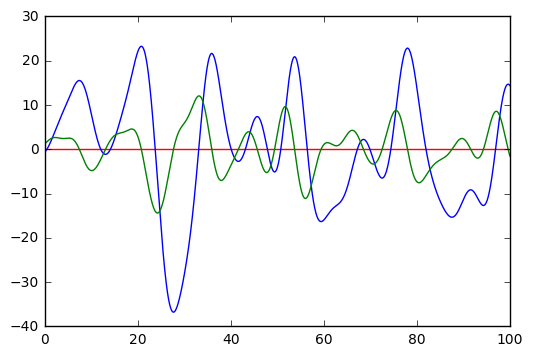

In [2289]:
space, A, alphas, ls_a = generate_sample(100, a_max=100, a_min=0, verbose=False, seed=None)
b = 1
f_obj = lambda x: -mean_profile(x, A, ls_a, alphas, beta=b)
f_obj_grad = lambda x: -grad_mean_profile(x, A, ls_a, alphas, beta=b)
f_obj_grad_vec = lambda v: [f_obj_grad(x) for x in np.array([v]).ravel()]
plt.plot(space, f_obj(space))
plt.plot(space, f_obj_grad_vec(space))
plt.hlines(0, 0, 100, "r")

#### Test of different optimization routines

In [1782]:
opts, nums = [], []
for i in range(1000):
    if i % 20 ==  0 : print (i, end=" ")
    space, A, alphas, ls_a = generate_sample(100, a_max=100, a_min=0, verbose=False, seed=None)
    opt, num = find_all_argmaxes(space, A, ls_a, alphas, method="detann", plot=False)
    opts.append(opt)
    nums.append(num)

0 20 40 60 80 100 120 140 160 180 

In [2281]:
N = 1000
for method in ["brute", "detann", "basinhop"]:
    print(method)
    opts, nums = [], []
    start = timer()
    for i in range(N):
        if i % 199 ==  0 : print (i+1, end=" ")
        space, A, alphas, ls_a = generate_sample(100, a_max=100, a_min=0, verbose=False, seed=None)
        opt, num = find_all_argmaxes(space, A, ls_a, alphas, method=method, plot=False)
        opts.append(opt)
        nums.append(num)
    stop = timer()
    quality_in_perc = np.sum(np.abs(np.array(opts) - np.array(nums)) < 0.2) / N * 100 
    print("{}  achieved {}% out of {} task samples and took {:.2f} secs" 
          "".format(method, quality_in_perc, N, stop-start))

brute
1 200 399 598 797 996 brute  achieved 99.8% out of 1000 task samples and took 67.58 secs
detann
1 200 399 598 797 996 detann  achieved 47.8% out of 1000 task samples and took 67.08 secs
basinhop
1 200 399 598 797 996 basinhop  achieved 88.3% out of 1000 task samples and took 3042.12 secs


#### Bad example where deterministic annealing could perform infinitely bad

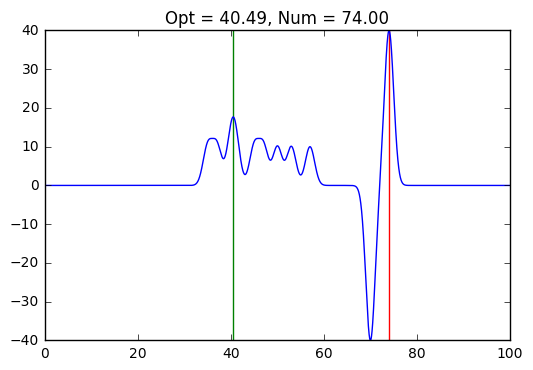

In [1830]:
A = np.array([35, 37, 40, 41, 45, 47, 50, 53, 57, 70, 74])
alphas = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, -40, 40]).reshape(-1,1)
ls_a = 1
opt, num = find_all_argmaxes(space, A, ls_a, method="detann", alphas)

#### Example when maximum jumps when beta increaseing from 0 to 1 : 

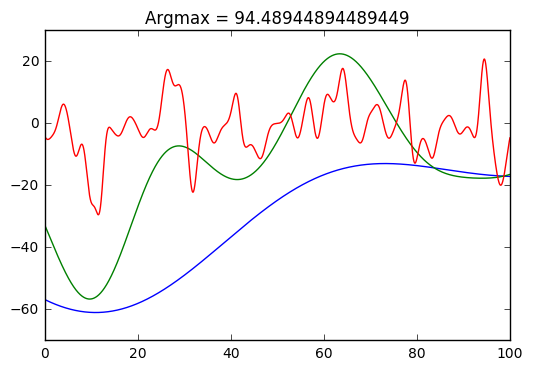

In [1786]:
def test_sum_of_exp(n_of_train, a_max=100, a_min=0, beta=1, verbose=False, seed=0):
    np.random.seed(seed=seed)
    space = np.linspace(a_min, a_max, 10000)
    A = np.random.uniform(a_min, a_max, size=n_of_train)
    alphas = sc.stats.t(2).rvs(n_of_train).reshape(-1,1)  + 1 
    alphas = sc.stats.norm(0,7).rvs(n_of_train).reshape(-1,1)
    ls_a = sc.stats.gamma(1, scale=3).rvs(1) 
#     argmax = find_max()
    plot_curve_on_space(space, A, ls_a, alphas, beta, a_max, a_min)
    if verbose:
        print("centers", A)
        print("alphas", alphas)
        print("ls", ls_a)
    return space, A, alphas, ls_a

space, A, alphas, ls_a = test_sum_of_exp(100, a_max=100, beta=.001, verbose=False, seed=0)
space, A, alphas, ls_a = test_sum_of_exp(100, a_max=100, beta=.01, verbose=False, seed=0)
space, A, alphas, ls_a = test_sum_of_exp(100, a_max=100, beta=1, verbose=False, seed=0)
# space, A, alphas, ls_a = test_sum_of_exp(100, a_max=100, beta=.2, verbose=False, seed=0)
# space, A, alphas, ls_a = test_sum_of_exp(100, a_max=100, beta=.68, verbose=False, seed=0)

In [ ]:
granularity = 2
np.vstack([np.repeat([1,2,3], granularity), np.tile(np.linspace(0,1,granularity), 3)]).T

In [1306]:
def test_sum_of_exp(n_of_train, a_max=100, a_min=0, beta=1, verbose=False, seed=0):
    np.random.seed(seed=0)
    space = np.linspace(a_min, a_max, 10000)
    A = np.random.uniform(a_min, a_max, size=n_of_train)
    alphas = sc.stats.t(100).rvs(n_of_train)  + 1 
    alphas = sc.stats.norm(0,7).rvs(n_of_train)
    ls_a = sc.stats.gamma(1, scale=3).rvs(1) 
    plot_curve_on_space(A, ls_a, alphas.reshape(-1,1), beta, a_max, a_min)
    if verbose:
        print("centers", A)
        print("alphas", alphas)
        print("ls", ls_a)
    return space, A, alphas, ls_a

 /Users/ipaulo/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


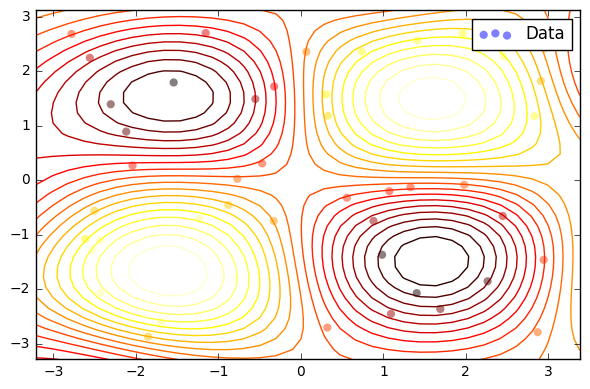

In [4]:
# SIMPLE MULTIVARIATE EXAMPLE
X = np.random.uniform(-3.,3.,(50,2))
f = lambda x:  np.sin(x[:,[0]]) * np.sin(x[:,[1]]) + np.random.randn(50,1) * 0.05
Y = f(X)
X_test = np.random.uniform(-3.,3.,(50,2))
Y_test = f(X_test)
ker = gpy.kern.RBF(2, ARD=True)  # + gpy.kern.White(2)
m = gpy.models.GPRegression(X,Y,ker)
m.optimize(max_f_eval = 1000)
fig = m.plot()
means_true, vars_true = m.predict_noiseless(X_test)


# HIGH LEVEL HAND IMPLEMENTED PREDICITON
from GPy.util.linalg import dtrtrs
Kx = m.kern.K(X, X_test)
means_test = np.dot(Kx.T, m.posterior.woodbury_vector)
Kxx = m.kern.Kdiag(X_test)
# if self._woodbury_chol.ndim == 2:  – this is strange
tmp = dtrtrs(m.posterior._woodbury_chol, Kx)[0]
vars_test = (Kxx - np.square(tmp).sum(0))[:, None]
assert(np.all([np.allclose(means_true, means_test), np.allclose(vars_true, vars_test)]))


# HAND IMPLEMENTED PREDICTION
Kxx = m.kern.K(X)
# add to diag elements, have no idea why to add 1e-8 (num stability?)
Kxx.flat[::Kxx.shape[0]+1] += m.likelihood.variance + 1e-8  
Wvec, Wchol = np.linalg.inv(Kxx) @ Y, np.linalg.cholesky(Kxx)
Kxtx = m.kern.K(X_test, X)
means_test = Kxtx @ Wvec
tmp = np.linalg.inv(Wchol) @ Kxtx.T
vars_test = (m.kern.Kdiag(X_test) -  np.square(tmp).sum(0)).reshape(-1,1)

assert np.allclose(Wchol, m.posterior.woodbury_chol)
assert np.allclose(Wvec, m.posterior.woodbury_vector)
means_true, vars_true =  m.predict_noiseless(X_test)
assert np.allclose(means_test, means_true)
assert np.allclose(vars_test, vars_true)

In [ ]:
Kxx = m.kern.K(X)
noise_var = m.likelihood.variance
# add to diag elements, have no idea why to add 1e-8 (num stability?)
Kxx.flat[::Kxx.shape[0]+1] += noise_var + 1e-8  
nWi, nLW = np.linalg.inv(Kxx), np.linalg.cholesky(Kxx)
nalpha = nWi @ Y
Wchol, Wvec = nLW, nalpha
means_test = m.kern.K(X_test, X) @ Wvec
vars_test  = Wchol

assert np.allclose(Wchol, m.posterior.woodbury_chol)
assert np.allclose(Wvec, m.posterior.woodbury_vector)
means_true, vars_true =  m.predict_noiseless(X_test)
assert np.allclose(means_test,means_true)
assert np.allclose(vars_test, vars_true)

In [290]:
Kxx = m.kern.K(X)
# add to diag elements, have no idea why to add 1e-8 (num stability?)
Kxx.flat[::Kxx.shape[0]+1] += m.likelihood.variance + 1e-8  
nWi, nLW = np.linalg.inv(Kxx), np.linalg.cholesky(Kxx)

Wi, LW, LWi, W_logdet = pdinv(Kxx)
alpha, _ = dpotrs(LW, Y, lower=1)
assert np.all(np.array([np.allclose(Wi, nWi), np.allclose(LW, nLW), np.allclose(Wi @ Y , alpha)]))

In [101]:
from GPy.util.linalg import dtrtrs
Kx = m.kern.K(X, X_test)
m_test = np.dot(Kx.T, m.posterior.woodbury_vector)
Kxx = m.kern.Kdiag(X_test)
tmp = dtrtrs(m.posterior._woodbury_chol, Kx)[0]
var_test = (Kxx - np.square(tmp).sum(0))[:, None]

In [367]:
Kxx = m.kern.K(X)
# add to diag elements, have no idea why to add 1e-8 (num stability?)
Kxx.flat[::Kxx.shape[0]+1] += m.likelihood.variance + 1e-8  
nWi, nLW = np.linalg.inv(Kxx), np.linalg.cholesky(Kxx) 
Wvec, Wchol = nWi @ Y, nLW
Kxtx = m.kern.K(X_test, X)
means_test = Kxtx @ Wvec
tmp = np.linalg.inv(nLW) @ Kxtx.T
vars_test = (m.kern.Kdiag(X_test) -  np.square(tmp).sum(0)).reshape(-1,1)

assert np.allclose(Wchol, m.posterior.woodbury_chol)
assert np.allclose(Wvec, m.posterior.woodbury_vector)
means_true, vars_true =  m.predict_noiseless(X_test)
assert np.allclose(means_test, means_true)
assert np.allclose(vars_test, vars_true)